In [258]:
#Kitabxanalarimizi import edirik
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,r2_score
import seaborn as sns 
from sklearn.impute import SimpleImputer
import plotly.express as px
df = pd.read_csv(r"C:\Users\orkha\OneDrive\Desktop\Python\Homework\Juni\clear_movie_data.csv")
df

,Film Adı,Tip,Yayın Tarixi,IMDB,Film Muddeti,Diller,Haqqında,Budce,Rejisor,Aktyorlar
0,Şouşenkdən Qaçış,"Cinayət, Dram",1994,9.3,142 dəq.,"Türkcə, İngiliscə, Rusca",1940-cı illərdə həyat yoldaşını və sevgilisini...,25000000$,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi..."
1,Xaç Atası,"Cinayət, Dram",1972,9.2,175 dəq.,"Türkcə, İngiliscə, Rusca","1945-1955-ci illəri əhatə edən, uydurma italya...",6000000$,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Robert D..."
2,Hörümçək Adam: Hörümçək Kainatı Boyunca,"Aksiyon, Animasiya, Fantastika, Macəra",2023,9.1,140 dəq.,"Türkcə, İngiliscə, Rusca",Qven Steysi ilə yenidən qovuşduqdan sonra Bruk...,100000000$,"Joaquim Dos Santos, Justin K. Thompson, Kemp P...","Shameik Moore, Hailee Steinfeld, Brian Tyree H..."
3,Üzüklərin Hökmdarı: Kralın Qayıdışı,"Aksiyon, Dram, Döyüş, Fantaziya, Macəra",2003,9.0,201 dəq.,"Türkcə, İngiliscə, Rusca",Aragorn qədim padşahların varisi kimi ortaya ç...,94000000$,Peter Jackson,"Elijah Wood, Ian McKellen, Liv Tyler, Viggo Mo..."
4,Şindlerin Siyahısı,"Dram, Hərbi, Tarix",1993,9.0,195 dəq.,"Türkcə, İngiliscə, Rusca, Azərbaycanca",İş adamı Oskar Şindlerin İkinci Dünya Müharibə...,22000000$,Steven Spielberg,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro..."
...,...,...,...,...,...,...,...,...,...,...
1620,Milad Həkimi,"Dram, Romantika",2020,NaN,90 dəq.,"Türkcə, İngiliscə, Rusca",Miladdan bir həftə əvvəl doktor Alicia Wright-...,NaN,Kevin Fair,"Holly Robinson Peete, Adrian Holmes, Fred Hend..."
1621,Yolun Sonu,"Aksiyon, Cinayət, Dram",2022,NaN,89 dəq.,"Türkcə, İngiliscə, Rusca",Bu yaxınlarda dul qalmış ana Brenda ailəsini q...,NaN,Millicent Shelton,"Queen Latifah, Ludacris, Beau Bridges, Keith J..."
1622,Nəfəs Al,Triller,2019,NaN,77 dəq.,"Türkcə, Rusca, İspanca",Aviaşirkətdə pilot kimi işə düzələ bilməyən Le...,NaN,Gabriel Grieco,"Sofía Gala Castiglione, Lautaro Delgado Tymruk..."
1623,Şimal Adamı,"Aksiyon, Dram, Döyüş, Fantaziya, Macəra",2022,NaN,137 dəq.,"Türkcə, İngiliscə, Rusca",Uşağın anasını qaçıran əmisi atası tərəfindən ...,90000000$,Robert Eggers,"Alexander Skarsgård, Claes Bang, Nicole Kidman..."


In [259]:
#IMDB NaN deyerleri silirik
df['IMDB'].fillna(int(df['IMDB'].mean()), inplace=True)
df

,Film Adı,Tip,Yayın Tarixi,IMDB,Film Muddeti,Diller,Haqqında,Budce,Rejisor,Aktyorlar
0,Şouşenkdən Qaçış,"Cinayət, Dram",1994,9.3,142 dəq.,"Türkcə, İngiliscə, Rusca",1940-cı illərdə həyat yoldaşını və sevgilisini...,25000000$,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi..."
1,Xaç Atası,"Cinayət, Dram",1972,9.2,175 dəq.,"Türkcə, İngiliscə, Rusca","1945-1955-ci illəri əhatə edən, uydurma italya...",6000000$,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Robert D..."
2,Hörümçək Adam: Hörümçək Kainatı Boyunca,"Aksiyon, Animasiya, Fantastika, Macəra",2023,9.1,140 dəq.,"Türkcə, İngiliscə, Rusca",Qven Steysi ilə yenidən qovuşduqdan sonra Bruk...,100000000$,"Joaquim Dos Santos, Justin K. Thompson, Kemp P...","Shameik Moore, Hailee Steinfeld, Brian Tyree H..."
3,Üzüklərin Hökmdarı: Kralın Qayıdışı,"Aksiyon, Dram, Döyüş, Fantaziya, Macəra",2003,9.0,201 dəq.,"Türkcə, İngiliscə, Rusca",Aragorn qədim padşahların varisi kimi ortaya ç...,94000000$,Peter Jackson,"Elijah Wood, Ian McKellen, Liv Tyler, Viggo Mo..."
4,Şindlerin Siyahısı,"Dram, Hərbi, Tarix",1993,9.0,195 dəq.,"Türkcə, İngiliscə, Rusca, Azərbaycanca",İş adamı Oskar Şindlerin İkinci Dünya Müharibə...,22000000$,Steven Spielberg,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro..."
...,...,...,...,...,...,...,...,...,...,...
1620,Milad Həkimi,"Dram, Romantika",2020,6.0,90 dəq.,"Türkcə, İngiliscə, Rusca",Miladdan bir həftə əvvəl doktor Alicia Wright-...,NaN,Kevin Fair,"Holly Robinson Peete, Adrian Holmes, Fred Hend..."
1621,Yolun Sonu,"Aksiyon, Cinayət, Dram",2022,6.0,89 dəq.,"Türkcə, İngiliscə, Rusca",Bu yaxınlarda dul qalmış ana Brenda ailəsini q...,NaN,Millicent Shelton,"Queen Latifah, Ludacris, Beau Bridges, Keith J..."
1622,Nəfəs Al,Triller,2019,6.0,77 dəq.,"Türkcə, Rusca, İspanca",Aviaşirkətdə pilot kimi işə düzələ bilməyən Le...,NaN,Gabriel Grieco,"Sofía Gala Castiglione, Lautaro Delgado Tymruk..."
1623,Şimal Adamı,"Aksiyon, Dram, Döyüş, Fantaziya, Macəra",2022,6.0,137 dəq.,"Türkcə, İngiliscə, Rusca",Uşağın anasını qaçıran əmisi atası tərəfindən ...,90000000$,Robert Eggers,"Alexander Skarsgård, Claes Bang, Nicole Kidman..."


In [260]:
#Budcede olan NaN deyeleri 0 beraber edirik fillna ile.
df["Budce"] = df["Budce"].fillna(0)
df

,Film Adı,Tip,Yayın Tarixi,IMDB,Film Muddeti,Diller,Haqqında,Budce,Rejisor,Aktyorlar
0,Şouşenkdən Qaçış,"Cinayət, Dram",1994,9.3,142 dəq.,"Türkcə, İngiliscə, Rusca",1940-cı illərdə həyat yoldaşını və sevgilisini...,25000000$,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi..."
1,Xaç Atası,"Cinayət, Dram",1972,9.2,175 dəq.,"Türkcə, İngiliscə, Rusca","1945-1955-ci illəri əhatə edən, uydurma italya...",6000000$,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Robert D..."
2,Hörümçək Adam: Hörümçək Kainatı Boyunca,"Aksiyon, Animasiya, Fantastika, Macəra",2023,9.1,140 dəq.,"Türkcə, İngiliscə, Rusca",Qven Steysi ilə yenidən qovuşduqdan sonra Bruk...,100000000$,"Joaquim Dos Santos, Justin K. Thompson, Kemp P...","Shameik Moore, Hailee Steinfeld, Brian Tyree H..."
3,Üzüklərin Hökmdarı: Kralın Qayıdışı,"Aksiyon, Dram, Döyüş, Fantaziya, Macəra",2003,9.0,201 dəq.,"Türkcə, İngiliscə, Rusca",Aragorn qədim padşahların varisi kimi ortaya ç...,94000000$,Peter Jackson,"Elijah Wood, Ian McKellen, Liv Tyler, Viggo Mo..."
4,Şindlerin Siyahısı,"Dram, Hərbi, Tarix",1993,9.0,195 dəq.,"Türkcə, İngiliscə, Rusca, Azərbaycanca",İş adamı Oskar Şindlerin İkinci Dünya Müharibə...,22000000$,Steven Spielberg,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro..."
...,...,...,...,...,...,...,...,...,...,...
1620,Milad Həkimi,"Dram, Romantika",2020,6.0,90 dəq.,"Türkcə, İngiliscə, Rusca",Miladdan bir həftə əvvəl doktor Alicia Wright-...,0,Kevin Fair,"Holly Robinson Peete, Adrian Holmes, Fred Hend..."
1621,Yolun Sonu,"Aksiyon, Cinayət, Dram",2022,6.0,89 dəq.,"Türkcə, İngiliscə, Rusca",Bu yaxınlarda dul qalmış ana Brenda ailəsini q...,0,Millicent Shelton,"Queen Latifah, Ludacris, Beau Bridges, Keith J..."
1622,Nəfəs Al,Triller,2019,6.0,77 dəq.,"Türkcə, Rusca, İspanca",Aviaşirkətdə pilot kimi işə düzələ bilməyən Le...,0,Gabriel Grieco,"Sofía Gala Castiglione, Lautaro Delgado Tymruk..."
1623,Şimal Adamı,"Aksiyon, Dram, Döyüş, Fantaziya, Macəra",2022,6.0,137 dəq.,"Türkcə, İngiliscə, Rusca",Uşağın anasını qaçıran əmisi atası tərəfindən ...,90000000$,Robert Eggers,"Alexander Skarsgård, Claes Bang, Nicole Kidman..."


In [261]:
#Str float ceviririk
df['Film Muddeti'] = df['Film Muddeti'].astype(str)
df['Film Muddeti'] = df['Film Muddeti'].str.extract('(\d+)').astype(float)
print(df.dtypes)

Film Adı         object
Tip              object
Yayın Tarixi      int64
IMDB            float64
Film Muddeti    float64
Diller           object
Haqqında         object
Budce            object
Rejisor          object
Aktyorlar        object
dtype: object


In [262]:
#Str float ceviririk
df['Budce'] = df['Budce'].astype(str)
df['Budce'] = df['Budce'].str.extract('(\d+)').astype(float)
print(df.dtypes)

Film Adı         object
Tip              object
Yayın Tarixi      int64
IMDB            float64
Film Muddeti    float64
Diller           object
Haqqında         object
Budce           float64
Rejisor          object
Aktyorlar        object
dtype: object


In [263]:
#Filmin adini ve Diller drop edirik,cunki neticeye hec bir tesiri yoxdu
df.drop (["Film Adı", "Diller","Haqqında"],axis = 1)

,Tip,Yayın Tarixi,IMDB,Film Muddeti,Budce,Rejisor,Aktyorlar
0,"Cinayət, Dram",1994,9.3,142.0,25000000.0,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi..."
1,"Cinayət, Dram",1972,9.2,175.0,6000000.0,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Robert D..."
2,"Aksiyon, Animasiya, Fantastika, Macəra",2023,9.1,140.0,100000000.0,"Joaquim Dos Santos, Justin K. Thompson, Kemp P...","Shameik Moore, Hailee Steinfeld, Brian Tyree H..."
3,"Aksiyon, Dram, Döyüş, Fantaziya, Macəra",2003,9.0,201.0,94000000.0,Peter Jackson,"Elijah Wood, Ian McKellen, Liv Tyler, Viggo Mo..."
4,"Dram, Hərbi, Tarix",1993,9.0,195.0,22000000.0,Steven Spielberg,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro..."
...,...,...,...,...,...,...,...
1620,"Dram, Romantika",2020,6.0,90.0,0.0,Kevin Fair,"Holly Robinson Peete, Adrian Holmes, Fred Hend..."
1621,"Aksiyon, Cinayət, Dram",2022,6.0,89.0,0.0,Millicent Shelton,"Queen Latifah, Ludacris, Beau Bridges, Keith J..."
1622,Triller,2019,6.0,77.0,0.0,Gabriel Grieco,"Sofía Gala Castiglione, Lautaro Delgado Tymruk..."
1623,"Aksiyon, Dram, Döyüş, Fantaziya, Macəra",2022,6.0,137.0,90000000.0,Robert Eggers,"Alexander Skarsgård, Claes Bang, Nicole Kidman..."


In [264]:
tip_mean_imbd = df.groupby("Tip")["IMDB"].transform("mean")
df["Tip_mean_imbd"] = tip_mean_imbd 

rejisor_mean_imbd  = df.groupby("Rejisor")["IMDB"].transform("mean")
df["Rejisor_encoded"] = rejisor_mean_imbd

aktyorlar_mean_imbd = df.groupby("Aktyorlar")["IMDB"].transform("mean")
df["Aktyorlar_encoded"] = aktyorlar_mean_imbd

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1625 entries, 0 to 1624
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Film Adı           1625 non-null   object 
 1   Tip                1623 non-null   object 
 2   Yayın Tarixi       1625 non-null   int64  
 3   IMDB               1625 non-null   float64
 4   Film Muddeti       1599 non-null   float64
 5   Diller             1621 non-null   object 
 6   Haqqında           1607 non-null   object 
 7   Budce              1625 non-null   float64
 8   Rejisor            1618 non-null   object 
 9   Aktyorlar          1604 non-null   object 
 10  Tip_mean_imbd      1623 non-null   float64
 11  Rejisor_encoded    1618 non-null   float64
 12  Aktyorlar_encoded  1604 non-null   float64
dtypes: float64(6), int64(1), object(6)
memory usage: 165.2+ KB


In [266]:
#asili ve musteqil deyisenlere ayiririg

df.columns = df.columns.str.strip()


X = df[["Yayın Tarixi", "Film Muddeti", "Budce", "Tip_mean_imbd", "Rejisor_encoded", "Aktyorlar_encoded"]]
y = df["IMDB"]

In [267]:
X

,Yayın Tarixi,Film Muddeti,Budce,Tip_mean_imbd,Rejisor_encoded,Aktyorlar_encoded
0,1994,142.0,25000000.0,8.208333,8.950000,9.3
1,1972,175.0,6000000.0,8.208333,8.600000,9.2
2,2023,140.0,100000000.0,9.100000,9.100000,9.1
3,2003,201.0,94000000.0,7.960000,8.266667,9.0
4,1993,195.0,22000000.0,7.750000,7.857143,9.0
...,...,...,...,...,...,...
1620,2020,90.0,0.0,6.164912,6.000000,6.0
1621,2022,89.0,0.0,6.150000,6.000000,6.0
1622,2019,77.0,0.0,5.362500,6.000000,6.0
1623,2022,137.0,90000000.0,7.960000,6.700000,6.0


In [268]:
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

In [269]:
# Dataseti test ve training hisselerine ayiririg
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [270]:
#Model yaradirig
Model = LinearRegression()
Model.fit(X_train,y_train)


LinearRegression()

In [271]:
#Modeli Test edirik
Model_pred=Model.predict(X_test)

In [278]:
#Modelin qiymetlendirilmesi

print("Lineat Regression asagida verdiyi netice: " , "\n")
print("Mean squared error:" ,mean_squared_error(y_test,Model_pred))
print("Mean absolute error:", (mean_absolute_error(y_test,Model_pred)))
print("R2 score:", r2_score(y_test,Model_pred))



Lineat Regression asagida verdiyi netice:  

Mean squared error: 0.05849489412919385
Mean absolute error: 0.04919997304044413
R2 score: 0.9560243578491646


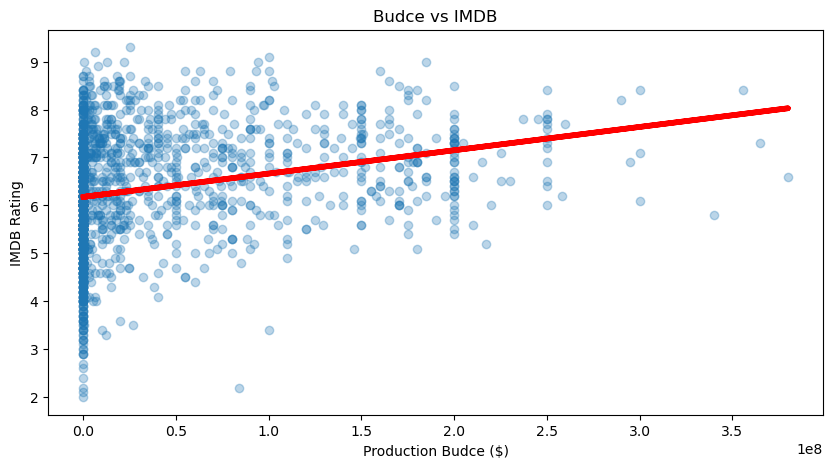

In [285]:
#Test deyelerinin vizuallasdiririg
plt.figure(figsize=(10, 5))
plt.scatter(df["Budce"], df["IMDB"], alpha=0.3)


budce_imdb_model = LinearRegression()
budce_imdb_X = df[['Budce']]
budce_imdb_y = df['IMDB']
budce_imdb_model.fit(budce_imdb_X, budce_imdb_y)
imdb_pred = budce_imdb_model.predict(budce_imdb_X)

plt.plot(df["Budce"], imdb_pred, color="red", linewidth=4)
plt.title("Budce vs IMDB")
plt.xlabel("Production Budce ($)")
plt.ylabel("IMDB Rating")
plt.show()